In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import plotly.express as px
import plotly.graph_objects as go
#pd.options.display.float_format = '{:.4f}'.format

In [2]:
df_results = pd.read_csv('Electoral_College.csv')
df_results = df_results.drop(df_results.columns[4:], axis = 1)
df_results_1976 = df_results[df_results['Year'] >= 1976]
df_results_1976.reset_index(inplace=True, drop=True)
df_results_1976.insert(2,'Population',np.zeros(612))
df_results_1976.insert(4,'VotesT',np.zeros(612))
df_results_1976.insert(len(df_results_1976.columns), 'WinnerVotes', np.zeros(612))
df_results_1976.insert(len(df_results_1976.columns), 'RunnerUpVotes', np.zeros(612))
df_results_1976.insert(len(df_results_1976.columns), 'WinnerVoteShare', np.zeros(612).astype('float'))
df_results_1976 = df_results_1976.replace('D.C.','District of Columbia')
df_results_1976

,Year,State,Population,Votes,VotesT,Party,WinnerVotes,RunnerUpVotes,WinnerVoteShare
0,1976,Alabama,0.0,9.0,0.0,D,0.0,0.0,0.0
1,1980,Alabama,0.0,9.0,0.0,R,0.0,0.0,0.0
2,1984,Alabama,0.0,9.0,0.0,R,0.0,0.0,0.0
3,1988,Alabama,0.0,9.0,0.0,R,0.0,0.0,0.0
4,1992,Alabama,0.0,9.0,0.0,R,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
607,2004,Wyoming,0.0,3.0,0.0,R,0.0,0.0,0.0
608,2008,Wyoming,0.0,3.0,0.0,R,0.0,0.0,0.0
609,2012,Wyoming,0.0,3.0,0.0,R,0.0,0.0,0.0
610,2016,Wyoming,0.0,3.0,0.0,R,0.0,0.0,0.0


In [3]:
pres_results = pd.read_csv('1976-2020-president.csv')
candidates_dict = {}
candidates_dict[1976] = {'D':'Carter','R':'Ford'}
candidates_dict[1980] = {'D':'Carter','R':'Reagan'}
candidates_dict[1984] = {'D':'Mondale','R':'Reagan'}
candidates_dict[1988] = {'D':'Dukakis','R':'Bush'}
candidates_dict[1992] = {'D':'Clinton','R':'Bush'}
candidates_dict[1996] = {'D':'Clinton','R':'Dole'}
candidates_dict[2000] = {'D':'Gore','R':'Bush'}
candidates_dict[2004] = {'D':'Kerry','R':'Bush'}
candidates_dict[2008] = {'D':'Obama','R':'McCain'}
candidates_dict[2012] = {'D':'Obama','R':'Romney'}
candidates_dict[2016] = {'D':'Clinton','R':'Trump'}
candidates_dict[2020] = {'D':'Biden','R':'Trump'}

In [4]:
ec_votes_dict = {}
ec_votes_dict[1976] = 1970
ec_votes_dict[1980] = 1970
ec_votes_dict[1984] = 1980
ec_votes_dict[1988] = 1980
ec_votes_dict[1992] = 1990
ec_votes_dict[1996] = 1990
ec_votes_dict[2000] = 1990
ec_votes_dict[2004] = 2000
ec_votes_dict[2008] = 2000
ec_votes_dict[2012] = 2010
ec_votes_dict[2016] = 2010
ec_votes_dict[2020] = 2010

In [5]:
state_pop = pd.read_csv('state_population.csv')
state_pop2 = pd.read_csv('nst-est2019-alldata.csv')
ec_votes = pd.read_csv('ElectoralCollegeData.csv')

In [44]:
for index,row in df_results_1976.iterrows():
    # population
    year = row['Year']
    state = row['State']
    column_str = '1/1/'+str(year)
    df_results_1976.at[index,'Population'] = state_pop[state_pop['State'] == state][column_str].iloc[0]*1000
        
    # theoretical electoral votes
    target_year = ec_votes_dict[year]
    if row['State'] == 'District of Columbia':
        df_results_1976.at[index,'VotesT'] = 1
    else:
        df_results_1976.at[index,'VotesT'] = ec_votes[(ec_votes['Year'] == target_year) & 
                                                 (ec_votes['State'] == state)]['VotesP'].iloc[0]
    
    #election results
    state_year_result = pres_results[(pres_results['year'] == year) & 
                                    (pres_results['state'] == state.upper()) &
                                    (pres_results['candidate'] != False)]
    
    names = state_year_result['candidate'].str.split(', ', 1, True)
    state_year_result = pd.concat([state_year_result, names[0]], axis=1)

    dem_votes = state_year_result[state_year_result[0] == candidates_dict[year]['D'].upper()]['candidatevotes'].sum()
    rep_votes = state_year_result[state_year_result[0] == candidates_dict[year]['R'].upper()]['candidatevotes'].sum()
    
    
    if row['Party'] == 'D':
        df_results_1976.at[index,'WinnerVotes'] = dem_votes
        df_results_1976.at[index,'RunnerUpVotes'] = rep_votes
        df_results_1976.at[index,'WinnerVoteShare'] = float(dem_votes / (dem_votes + rep_votes))
        
    else:
        df_results_1976.at[index,'WinnerVotes'] = rep_votes
        df_results_1976.at[index,'RunnerUpVotes'] = dem_votes
        df_results_1976.at[index,'WinnerVoteShare'] = float(rep_votes / (dem_votes + rep_votes))

In [45]:
columns = ['Population','Votes','VotesT','WinnerVotes','RunnerUpVotes']
for column in columns:
    df_results_1976[column] = df_results_1976[column].apply(np.int64)
df_results_1976

,Year,State,Population,Votes,VotesT,Party,WinnerVotes,RunnerUpVotes,WinnerVoteShare
0,1976,Alabama,3735139,9,9,D,659170,504070,0.566667
1,1980,Alabama,3900368,9,9,R,654192,636730,0.506763
2,1984,Alabama,3951820,9,9,R,872849,551899,0.612634
3,1988,Alabama,4023844,9,9,R,815576,549506,0.597456
4,1992,Alabama,4139269,9,9,R,804283,690080,0.538211
...,...,...,...,...,...,...,...,...,...
607,2004,Wyoming,509106,3,1,R,167629,70776,0.703127
608,2008,Wyoming,546043,3,1,R,164958,82868,0.665620
609,2012,Wyoming,576656,3,1,R,170962,69286,0.711606
610,2016,Wyoming,585243,3,1,R,174419,55973,0.757053


In [46]:
rep_votes_wta_ca = []
dem_votes_wta_ca = []
rep_votes_wta_ta = []
dem_votes_wta_ta = []
rep_votes_ps_ca = []
dem_votes_ps_ca = []
rep_votes_ps_ta = []
dem_votes_ps_ta = []

years_list = df_results_1976['Year'].value_counts().index.tolist()
years_list = years_list[::-1]

In [47]:
for year in years_list:
    rep_wta_ca = 0
    dem_wta_ca = 0
    rep_wta_ta = 0
    dem_wta_ta = 0
    rep_ps_ca = 0
    dem_ps_ca = 0
    rep_ps_ta = 0
    dem_ps_ta = 0
    
    year_results = df_results_1976[df_results_1976['Year'] == year]
    
    for index, row in year_results.iterrows():
        if row['Party'] == 'D':
            dem_wta_ca += row['Votes']
            dem_wta_ta += row['VotesT']
            
            dem_votes_ca = math.ceil(row['WinnerVoteShare']*row['Votes'])
            dem_ps_ca += dem_votes_ca
            rep_ps_ca += row['Votes'] - dem_votes_ca
            
            dem_votes_ta = math.ceil(row['WinnerVoteShare']*row['VotesT'])
            dem_ps_ta += dem_votes_ta
            rep_ps_ta += row['VotesT'] - dem_votes_ta
            
        else:
            rep_wta_ca += row['Votes']
            rep_wta_ta += row['VotesT']
            
            rep_votes_ca = math.ceil(row['WinnerVoteShare']*row['Votes'])
            rep_ps_ca += rep_votes_ca
            dem_ps_ca += row['Votes'] - rep_votes_ca
            
            rep_votes_ta = math.ceil(row['WinnerVoteShare']*row['VotesT'])
            rep_ps_ta += rep_votes_ta
            dem_ps_ta += row['VotesT'] - rep_votes_ta
            
    rep_votes_wta_ca.append(rep_wta_ca)
    dem_votes_wta_ca.append(dem_wta_ca)
    rep_votes_wta_ta.append(rep_wta_ta)
    dem_votes_wta_ta.append(dem_wta_ta)
    rep_votes_ps_ca.append(rep_ps_ca)
    dem_votes_ps_ca.append(dem_ps_ca)
    rep_votes_ps_ta.append(rep_ps_ta)
    dem_votes_ps_ta.append(dem_ps_ta)

In [48]:
print([x%100 for x in years_list])
print(dem_votes_wta_ca)
print(dem_votes_wta_ta)
print(dem_votes_ps_ca)
print(dem_votes_ps_ta)

[76, 80, 84, 88, 92, 96, 0, 4, 8, 12, 16, 20]
[297, 49, 13, 112, 370, 379, 267, 252, 364, 332, 233, 306]
[307, 43, 11, 110, 377, 390, 278, 261, 375, 342, 235, 312]
[271, 219, 195, 233, 291, 298, 263, 258, 290, 284, 270, 284]
[275, 223, 191, 231, 295, 300, 268, 254, 295, 285, 273, 283]


In [49]:
print(rep_votes_wta_ca)
print(rep_votes_wta_ta)
print(rep_votes_ps_ca)
print(rep_votes_ps_ta)

[241, 489, 525, 426, 168, 159, 271, 286, 174, 206, 305, 232]
[231, 495, 527, 428, 161, 148, 260, 277, 163, 196, 303, 226]
[267, 319, 343, 305, 247, 240, 275, 280, 248, 254, 268, 254]
[263, 315, 347, 307, 243, 238, 270, 284, 243, 253, 265, 255]


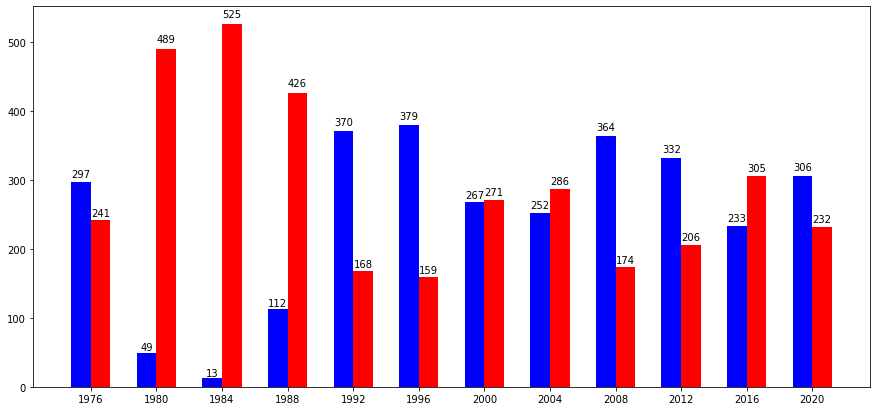

In [87]:
width = 0.3
x = np.arange(12)
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
dems = ax.bar(x, dem_votes_wta_ca, width, color='blue')
reps = ax.bar(x+width, rep_votes_wta_ca, width, color='red')
ax.set_xticks(x+width/2)
ax.set_xticklabels(years_list)

for bar in dems:
    h = bar.get_height()
    ax.text(bar.get_x()+bar.get_width()/2., 1.015*h, '%d'%int(h),
                ha='center', va='bottom')

for bar in reps:
    h = bar.get_height()
    ax.text(bar.get_x()+bar.get_width()/2., 1.015*h, '%d'%int(h),
               ha='center', va='bottom')

plt.show()